## BE485, Lab 10, Ex 3
 In this exercise:<br>
 1. Read Drone image
 2. Compute Trandformation equations
 3. Georeference image

In [12]:
# Import all necessary libraries

import os
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

#Import the VIP Library
import viplab_lib5 as vip

# This is a magic function call that renders the figure in a notebook
# instead of displaying a dump of the figure object
%matplotlib inline

print (os.getcwd())


C:\Users\theboss\BE485\Lab\Lab_10_Code


In [13]:
# user defined functions

def get_EquationCoeff(data, idX, idX2,  idY, deg=2):
    # use multilinear least square regression to get coefficients 
     
    nrows,ncols=data.shape
    X=np.zeros((nrows,deg-1))
    a=data[:,idX]
    b=data[:,idX2]
    
    X[:,0]=a
    if(deg>2):
        X[:,1]=b
        
    if(deg>3):
        X[:,2]=a*b
        
    if(deg>5):
        X[:,3]=a*a
        X[:,4]=b*b

    y=data[:,idY]
    X=sm.add_constant(X)
    model=sm.OLS(y,X).fit()

    r2=model._results.rsquared
    coeffs=model._results.params

    #print(model.summary())
    return coeffs,r2    


def geolocate(r,c,coefX,coefY,deg):
    if(deg==3):
      u=coefX[0]+coefX[1]*c+coefX[2]*r
      v=coefY[0]+coefY[1]*c+coefY[2]*r 
    elif(deg==4):
      u=coefX[0]+coefX[1]*c+coefX[2]*r+coefX[3]*r*c
      v=coefY[0]+coefY[1]*c+coefY[2]*r+coefY[3]*r*c
    elif(deg==6):
      u=coefX[0]+coefX[1]*c+coefX[2]*r+coefX[3]*r*c+coefX[4]*c*c+coefX[5]*r*r
      v=coefY[0]+coefY[1]*c+coefY[2]*r+coefY[3]*r*c+coefY[4]*c*c+coefY[5]*r*r
    else:
        print("Not a valid degree for geolocation")
        sys.exit()
      
    return v,u

## Main program starts here !
## 1. Define and read input data file

In [14]:
# start of main script

filename="./Data/DRONE_MARICOPA_IMAGE.bsq"
nrows=960
ncols=1280
datatype=np.uint16
print("Reading drone Image... ",filename)
droneImage=vip.BSQ_band_read(filename,0,nrows,ncols,datatype)

Reading drone Image...  ./Data/DRONE_MARICOPA_IMAGE.bsq


## 2. Display input data

(-0.5, 1279.5, 959.5, -0.5)

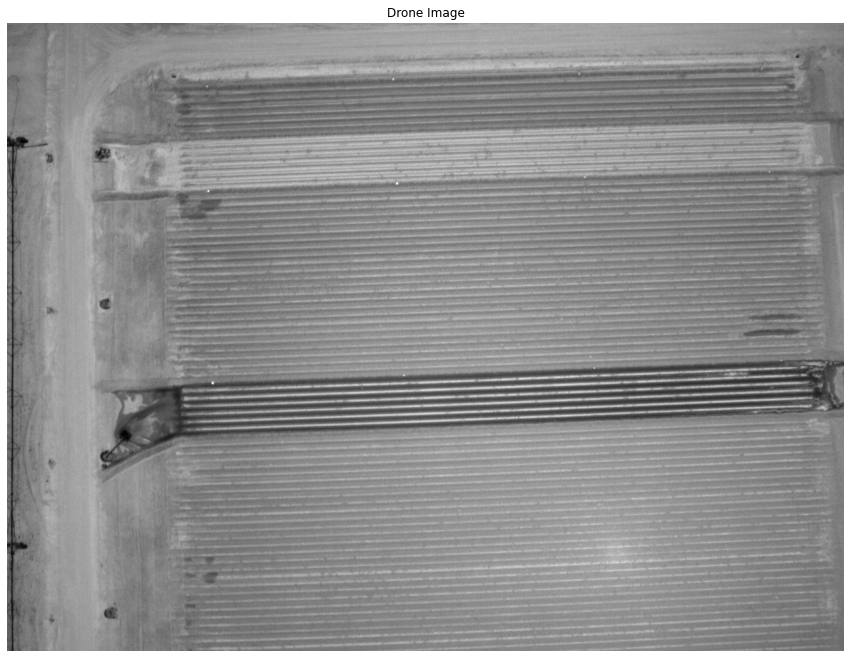

In [15]:
#Display input data 

plt.figure(figsize=(15,15))
plt.imshow(droneImage, cmap='gray')
plt.title("Drone Image")
plt.axis('off')

## 3. Define GCP locations

In [16]:
# gcp information 
# These numbers define a location in terms of its coordinates within 
# the image and then its real Geographic (Lat-Lon) location
# The process then ties the image to these known point and transforms the rest (all pixels) of the image
gcplist=np.array([
 [306,	97,	 -111.9722845,	33.06683512],
 [590,	86,	 -111.9725523,	33.06683303],
 [875,	77,	 -111.97282, 33.06683094],
[1154,	70,	 -111.9730878,	33.06682885],
[307,	257, -111.9722859	, 33.06696341],
[596,	245	, -111.9725537,	33.06696132],
[883,	236	, -111.9728215,	33.06695923],
[1166,	227	, -111.9730892,	33.06695714],
[314, 550,	 -111.9722884,	33.06719249],
[607, 539,	 -111.9725562,	33.0671904],
[898,	527, -111.972824,	 33.06718831],
[1184,	516	, -111.9730918,	33.06718622]])

##  4. Display input data

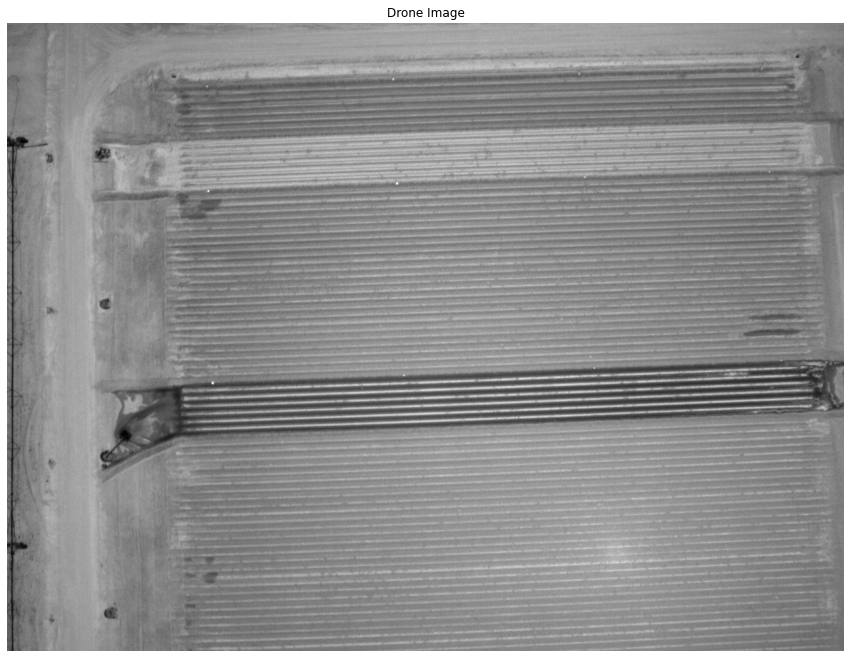

In [22]:
#Display input data 

plt.figure(figsize=(15,15))
plt.imshow(droneImage, cmap='gray')
plt.title("Drone Image")
plt.axis('off')

#plt.plot(GCP_x_coords,GCP_y_coords,'ro', alpha=0.5) 

#plt.scatter(GCP_x_coords,GCP_y_coords, s=50, facecolors='none', edgecolors='b')

plt.show()

## 5. Calculate Equation tranformation coefficients

In [24]:
# deg possible values are: 3, 4, and 6
deg=6

# Create regression 3 terms
print("Forward Mapping:")
coefX,r2=get_EquationCoeff(gcplist, 0, 1,  2, deg)
coefY,ry2=get_EquationCoeff(gcplist, 0, 1,  3, deg)


print("Coefficients X:",coefX, ", r2=",r2)
print("Coefficients Y:",coefY, ", r2=",ry2)

print("\nInverse Mapping:")

coefXInv,r2=get_EquationCoeff(gcplist, 2, 3,  0, deg)
coefYInv,ry2=get_EquationCoeff(gcplist, 2, 3,  1, deg)

#CoefYInv=[-38623921.18,27869.92596,1262433.393]

print("Coefficients X:",coefXInv, ", r2=",r2)
print("Coefficients Y:",coefYInv, ", r2=",ry2)

Forward Mapping:
Coefficients X: [-1.11972002e+02 -9.26036175e-07 -7.44662304e-09  5.23832844e-11
 -1.53456536e-11  8.40230392e-13] , r2= 0.9999943586948676
Coefficients Y: [ 3.30667493e+01  2.48882877e-08  8.16459328e-07  1.02352627e-11
 -4.85874635e-12 -5.13338460e-11] , r2= 0.9999923751928925

Inverse Mapping:
Coefficients X: [-8.39885738e+07 -2.47480383e+09 -8.37885941e+09 -7.23801119e+07
 -2.17335428e+07  4.14773663e+06] , r2= 0.9999945723904508
Coefficients Y: [-2.33725278e+07 -6.88349036e+08 -2.33066339e+09  2.90436540e+07
  1.21462386e+06  8.44349165e+07] , r2= 0.9999835453318239


## 6. Compute Map extent and set pixel size 

In [25]:
#Compute Image size to Hold full Image
# project each corner
Corners=np.zeros((4,2))
Corners[0,0],Corners[0,1]=geolocate(0,0,coefX,coefY,deg)
Corners[1,0],Corners[1,1]=geolocate(0,ncols,coefX,coefY,deg)
Corners[2,0],Corners[2,1]=geolocate(nrows,ncols,coefX,coefY,deg)
Corners[3,0],Corners[3,1]=geolocate(nrows,0,coefX,coefY,deg)


#compute aprox pixel size to keep it
delta_lat=np.abs(Corners[0,0]-Corners[3,0])
delta_lon=np.abs(Corners[0,1]-Corners[2,1])

pixelsizeX= delta_lon / ncols
pixelsizeY= delta_lat / nrows

# take the smallest
if(pixelsizeX<pixelsizeY):
    pixelsize=pixelsizeX
else:
    pixelsize=pixelsizeY    
    
print("pixelsizeX=",pixelsizeX,", pixelsizeY=",pixelsizeY)


#size of Map
# get min and max values
latmin=Corners[:,0].min()
latmax=Corners[:,0].max()

lonmin=Corners[:,1].min()
lonmax=Corners[:,1].max()

MapRows= int( (latmax-latmin) / pixelsize)
MapCols= int( (lonmax-lonmin) / pixelsize)

print("\nMap geographic extent:")
print("latmin=",latmin,", latmax=",latmax, ", lonmin=",lonmin,"lonmax=",lonmax)
print("Map size: nrows=",MapRows,", ncols=",MapCols)


pixelsizeX= 9.003706595955841e-07 , pixelsizeY= 7.671788360215833e-07

Map geographic extent:
latmin= 33.06674928532145 , latmax= 33.0675222505331 , lonmin= -111.97321209574913 lonmax= -111.9720016271268
Map size: nrows= 1007 , ncols= 1577


## 7. Create Output Image

In [26]:
# Create dataset to hold projected image
MapImage=np.zeros((MapRows,MapCols),datatype)

print("\nGeolocating image... it may take some time")
Start=vip. startTime()

# Use inverse Mapping for geolocation
for y in range(MapRows):
    lat= latmax - (y*pixelsize)  
    for x in range(MapCols):
       lon=lonmin + (x*pixelsize) 
       r,c= geolocate(lat,lon,coefXInv,coefYInv,deg) 
       r=int(r)
       c=int(c)
       if(r>=0 and c>=0 and r<nrows and c<ncols):
           MapImage[y,x]=droneImage[r,c]
          

vip.endTime(Start,'Mapping')


Geolocating image... it may take some time
Mapping 11.69  seconds


## 8. Display Output Image

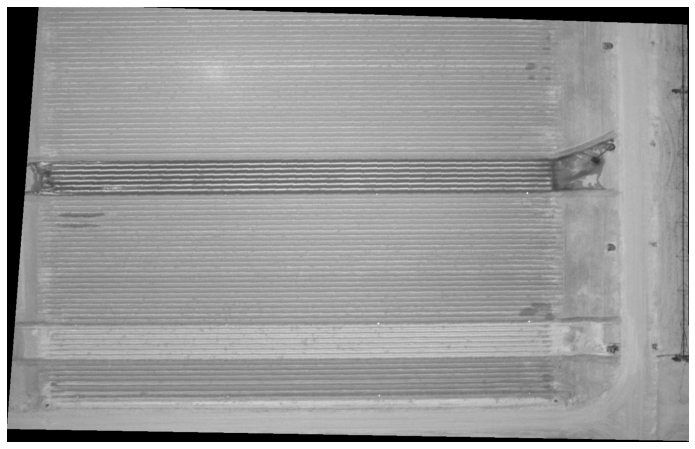

In [29]:
plt.figure(figsize=(16,8))
plt.imshow(MapImage,cmap="gray")
#plt.title("Geolocated Image")
plt.axis('off')
plt.savefig("Maricopa_Google.jpg")

## 7. Homework (see presentation & instructions)
### Display the GCP locations in the input image
### Save image to file as jpg/png
### Try to load the image in Google Earth as an overlay by specifying the lat x lon box (output by your program)
### Was the image properly Geolocated?

In [23]:
# your code here

In [22]:
print("program ended.")

program ended.
